## Calculating the probability of lensing of GW sources

Here we calculate the probablity of lensing. Lenses are galaxy clusters (preferably massive). We have used the redshift distribution of *KNOWN* galaxy clusters. Two catalogues are used: https://ui.adsabs.harvard.edu/abs/2017AstL...43..507B/abstract https://ui.adsabs.harvard.edu/abs/2016A%26A...594A..27P/abstract

Here we consider the probability of strong lensing (happening within the Einstein radius). We are working in geometrical optics regime. The cutoff frequency is $f_c=1.6\times10^{4}(M/M_{\odot})$. If the frequency of GW is higher than $f_c$ we are in geometric optic regime and the GW is a subject to magnification and strong lensing. In case of PTAs the sensitivity is range is between $10^{-9}-10^{-7}$ Hz. Therefore, if lenses are represented by galaxy clusters with masses more than $10^{14} M_{sun}$, the geometric optic limit is valid. In case, the lenses are represented by galaxies with masses around $10^8 M_{sun}$, the nHz gravitational waves are subject to diffraction.

In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import interpolate
from astroquery.vizier import Vizier #access to vizier database
from astropy.cosmology import WMAP9 as cosmo

In [117]:
z_lens=0.1
z_source=1.2
M=10**14 #Msun
rg=3*10**3*(M) #m
c=3*10**8 #m
H0=70.*10.**3/3./10**16/10**6
Mpc2m=10**6*3*10**16
#angular distances
D_L=cosmo.angular_diameter_distance([z_lens]).value*Mpc2m
D_S=cosmo.angular_diameter_distance([z_source]).value*Mpc2m
D_LS=cosmo.angular_diameter_distance_z1z2(z_lens, z_source).value*Mpc2m
#equation (3.49) from http://www.ita.uni-heidelberg.de/~massimo/sub/Lectures/gl_all.pdf
print "Einstein angle:", np.sqrt(2.*rg)*math.sqrt(D_LS/D_L/D_S)

Einstein angle: 0.00021511510733597183


Using the SDSS Catalogue of galaxy clusters (redMapper Catalogue DR8)

In [122]:
#loading the catalogue (redmapper DR8)
Vizier.ROW_LIMIT = -1
sdss_cat_dr8 = Vizier.get_catalogs('J/ApJS/224/1/cat_dr8')

See the redshift distribution and richness distribution. As it was shown reachness correlates with the mass of a cluster. We are not using reachness parameter in the analysis

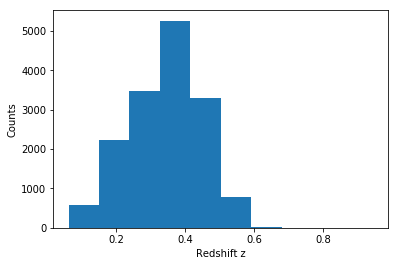

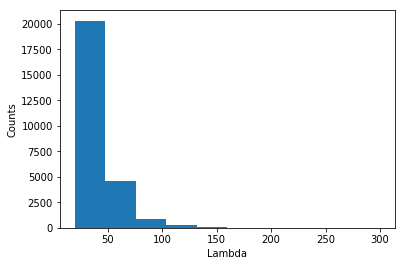

In [123]:
zspec=sdss_cat_dr8[0]["zspec"]
lambda_rich=sdss_cat_dr8[0]["lambda"]
plt.hist(zspec)
plt.xlabel("Redshift z")
plt.ylabel("Counts")
plt.show()
plt.hist(lambda_rich)
plt.xlabel("Lambda")
plt.ylabel("Counts")
plt.show()

Counting the probability of lensing as $\sum \pi \theta_E^2/4\pi$. The masses of clusters are assumed to be 10^14 M_sun

In [124]:
M=10**14 #Msun
rg=3*10**3*(M) #m
S_ang_array=[]
S_ang_res=0
#range of redshifts
zspec=np.array(np.sort(zspec))
zspec = zspec[np.logical_not(np.isnan(zspec))]
z_array_L=zspec
D_L=np.array([cosmo.angular_diameter_distance([z_array_L[i]]).value*Mpc2m for i in range(len(z_array_L))])
z_array_S=np.arange(0.01, 6, 0.1)
for i in range(len(z_array_S)):
    z_S=z_array_S[i]
    D_S=cosmo.angular_diameter_distance([z_S]).value*Mpc2m
    for j in range(len(z_array_L)):
        if z_array_L[j]>=z_S:
            break
        else:
            D_LS=cosmo.angular_diameter_distance_z1z2(z_array_L[j], z_S).value*Mpc2m
            theta_E=np.sqrt(2.*rg)*math.sqrt(D_LS/D_L[j]/D_S)
            S_ang=math.pi*theta_E**2
            S_ang_res=S_ang+S_ang_res
    S_ang_array=np.append(S_ang_array, S_ang_res)
    S_ang_res=0

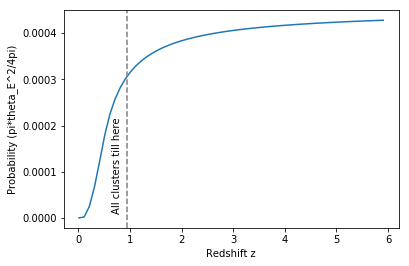

In [125]:
#SDSS DR8 only observed 35% of the sky
#therefore assume isotropic distribution of galaxy clusters (x3)
plt.plot(z_array_S, 3*S_ang_array/4/math.pi*2)
plt.xlabel("Redshift z")
plt.ylabel("Probability (pi*theta_E^2/4pi)")
plt.text(0.8, 0.00001, "All clusters till here", rotation=90, rotation_mode='anchor')
plt.axvline(max(zspec), ls="--", c="grey")

Using Burenin catalogue (Planck verified with SDSS and WISE)

In [127]:
#loading Burenin catalogue
Vizier.ROW_LIMIT = -1
cat_bur_2017 = Vizier.get_catalogs('J/PAZh/43/559')

Text(0,0.5,'Counts')

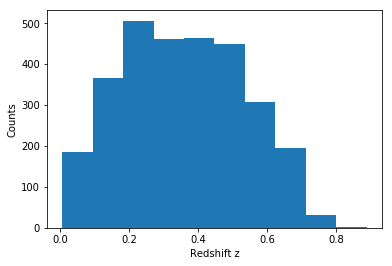

In [128]:
#see the z distribution
zspec=cat_bur_2017[0]["z"]
plt.hist(zspec)
plt.xlabel("Redshift z")
plt.ylabel("Counts")

Mass of the clusters are 3*10^14 Msun

In [129]:
M=3*10**14 #Msun
rg=3*10**3*(M) #m
S_ang_array=[]
S_ang_res=0
#range of redshifts
zspec=np.array(np.sort(zspec))
zspec = zspec[np.logical_not(np.isnan(zspec))]
z_array_L=zspec
D_L=np.array([cosmo.angular_diameter_distance([z_array_L[i]]).value*Mpc2m for i in range(len(z_array_L))])
z_array_S=np.arange(0.01, 6, 0.1)
for i in range(len(z_array_S)):
    z_S=z_array_S[i]
    D_S=cosmo.angular_diameter_distance([z_S]).value*Mpc2m
    for j in range(len(z_array_L)):
        if z_array_L[j]>=z_S:
            break
        else:
            D_LS=cosmo.angular_diameter_distance_z1z2(z_array_L[j], z_S).value*Mpc2m
            theta_E=np.sqrt(2.*rg)*math.sqrt(D_LS/D_L[j]/D_S)
            S_ang=math.pi*theta_E**2
            S_ang_res=S_ang+S_ang_res
    S_ang_array=np.append(S_ang_array, S_ang_res)
    S_ang_res=0

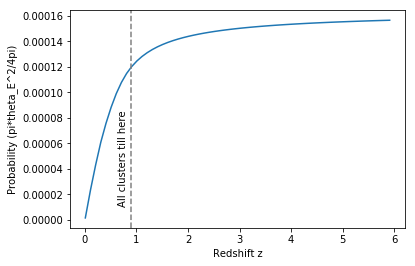

In [130]:
#Burenin catalogue also covers only SDSS visible part of the sky
#SDSS DR8 only observed 35% of the sky
#therefore assume isotropic distribution of galaxy clusters (x3)
plt.plot(z_array_S, 3*S_ang_array/4/math.pi)
plt.xlabel("Redshift z")
plt.ylabel("Probability (pi*theta_E^2/4pi)")
plt.text(0.8, 0.00001, "All clusters till here", rotation=90, rotation_mode='anchor')
plt.axvline(max(zspec), ls="--", c="grey")